In [ ]:
import cv2
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive

from imblearn.under_sampling import NearMiss

from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix

import keras
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

In [ ]:
filepath ="/content/drive/MyDrive/A_Z Handwritten Data (1).csv"
alpha_data = pd.read_csv(filepath)

In [ ]:
alpha_data.head()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32,0.33,0.34,0.35,0.36,0.37,0.38,0.39,...,0.609,0.610,0.611,0.612,0.613,0.614,0.615,0.616,0.617,0.618,0.619,0.620,0.621,0.622,0.623,0.624,0.625,0.626,0.627,0.628,0.629,0.630,0.631,0.632,0.633,0.634,0.635,0.636,0.637,0.638,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Seperating dependent variable from independent variables
y = alpha_data['0']
del alpha_data['0']

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


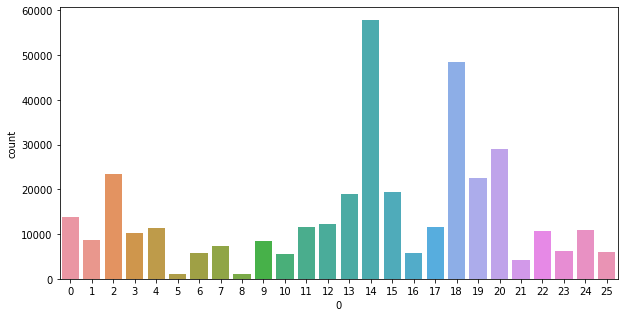

In [ ]:
plt.figure(figsize = (10,5))
sns.countplot(y)

In [ ]:
nM = NearMiss()
X_data, y_data = nM.fit_sample(alpha_data, y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


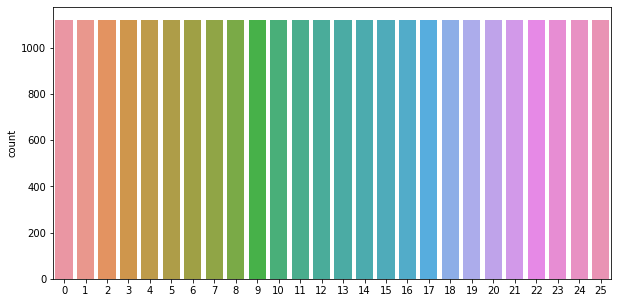

In [ ]:
plt.figure(figsize = (10,5))
sns.countplot(y_data)

In [ ]:
lB = LabelBinarizer()
y = lB.fit_transform(y_data)
y

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1]])

In [ ]:
X_data = X_data / 255
X_data

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
X_data = X_data.reshape(-1,28,28,1)

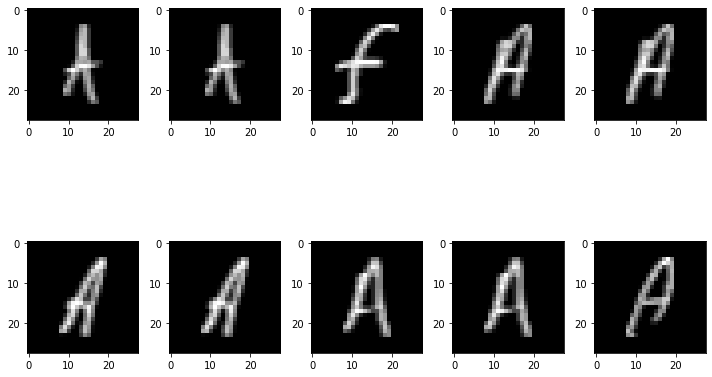

In [ ]:
# Showing few images

f, ax = plt.subplots(2,5)
f.set_size_inches(10,10)
k = 0
for i in range(2):
    for j in range(5):
        ax[i,j].imshow(X_data[k].reshape(28,28), cmap='gray')
        k += 1
    plt.tight_layout()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y, test_size=0.2)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)
X_train.shape, X_test.shape, X_valid.shape, y_train.shape, y_test.shape, y_valid.shape

((18636, 28, 28, 1),
 (5824, 28, 28, 1),
 (4660, 28, 28, 1),
 (18636, 26),
 (5824, 26),
 (4660, 26))

In [ ]:
dataGen = ImageDataGenerator(rotation_range=10,
                             zoom_range=0.1,
                             width_shift_range=0.1,
                             height_shift_range=0.1)
dataGen.fit(X_train)

In [ ]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience = 2, 
                                            verbose=1,factor=0.5, min_lr=0.00001)

In [ ]:
model = Sequential()
model.add(Conv2D(75 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = (28,28,1)))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(50 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(25 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Flatten())
model.add(Dense(units = 512 , activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(units = 26 , activation = 'softmax'))
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 75)        750       
_________________________________________________________________
batch_normalization_3 (Batch (None, 28, 28, 75)        300       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 75)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 50)        33800     
_________________________________________________________________
dropout_2 (Dropout)          (None, 14, 14, 50)        0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 14, 14, 50)        200       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 50)         

In [ ]:
import tensorflow as tf


In [ ]:
checkpoint_path = "/content/drive/MyDrive/variables/ocr.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)

history = model.fit(dataGen.flow(X_train,y_train, batch_size = 128) ,epochs = 5 , 
                    validation_data = (X_valid, y_valid) , 
                    callbacks = [learning_rate_reduction,cp_callback])

Epoch 1/5
146/146 [==============================] - 38s 39ms/step - loss: 1.7040 - accuracy: 0.5209 - val_loss: 3.6581 - val_accuracy: 0.0854

Epoch 00001: saving model to /content/drive/MyDrive/variables/ocr.ckpt
Epoch 2/5
146/146 [==============================] - 5s 36ms/step - loss: 0.3333 - accuracy: 0.8984 - val_loss: 2.7622 - val_accuracy: 0.1768

Epoch 00002: saving model to /content/drive/MyDrive/variables/ocr.ckpt
Epoch 3/5
146/146 [==============================] - 5s 36ms/step - loss: 0.2233 - accuracy: 0.9342 - val_loss: 1.1228 - val_accuracy: 0.6054

Epoch 00003: saving model to /content/drive/MyDrive/variables/ocr.ckpt
Epoch 4/5
146/146 [==============================] - 5s 36ms/step - loss: 0.1900 - accuracy: 0.9445 - val_loss: 0.1859 - val_accuracy: 0.9528

Epoch 00004: saving model to /content/drive/MyDrive/variables/ocr.ckpt
Epoch 5/5
146/146 [==============================] - 5s 36ms/step - loss: 0.1570 - accuracy: 0.9534 - val_loss: 0.0994 - val_accuracy: 0.9708



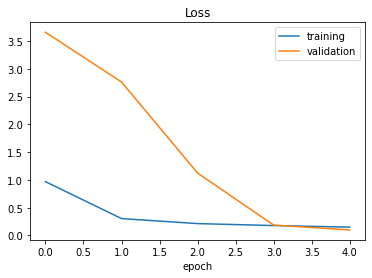

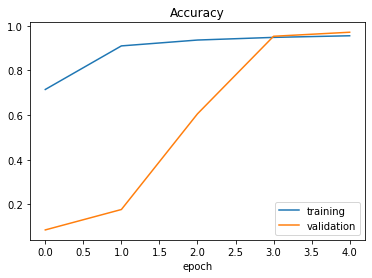

In [ ]:
plt.figure(1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training','validation'])
plt.title('Loss')
plt.xlabel('epoch')
plt.figure(2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training','validation'])
plt.title('Accuracy')
plt.xlabel('epoch')
plt.show()

In [ ]:
score = model.evaluate(X_test,y_test,verbose=0)
print('Test Score = ',score[0])
print('Test Accuracy =', score[1])

Test Score =  0.09934910386800766
Test Accuracy = 0.9725274443626404


In [ ]:
className = {0:'A', 1:'B', 2:'C', 3:'D', 4:'E',
             5:'F', 6:'G', 7:'H', 8:'I', 9:'J',
             10:'K', 11:'L', 12:'M', 13:'N', 14:'O',
             15:'P', 16:'Q', 17:'R', 18:'S', 19:'T', 
             20:'U', 21:'V', 22:'W', 23:'X', 24:'Y',
             25:'Z'}

In [ ]:
predictions = model.predict_classes(X_test)
predictions[:5] 

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([10, 24, 11,  8,  3])

In [ ]:
y_test[0:5]

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0]])

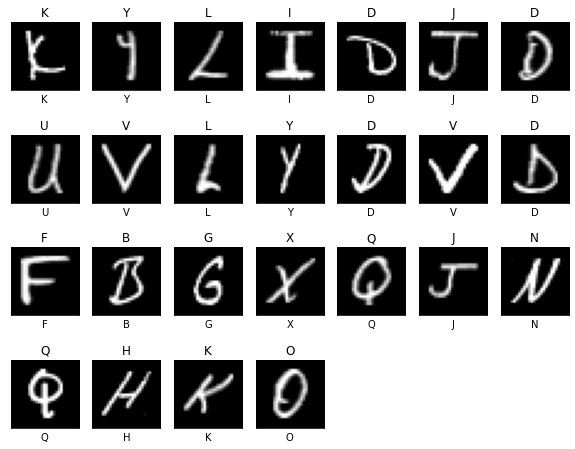

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,7,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_test[i].reshape(28,28), cmap='gray')
    plt.title(className[np.argmax(y_test[i])])
    plt.xlabel(className[predictions[i]])
plt.show()

In [ ]:
model.save('Alpha.model')

INFO:tensorflow:Assets written to: Alpha.model/assets


***USER INPUT***

In [ ]:
def input_prepare(img):
    img = np.asarray(img)              # convert to array 
    img = cv2.resize(img, (28, 28 ))   # resize to target shape 
    img = cv2.bitwise_not(img)         # [optional] my input was white bg, I turned it to black - {bitwise_not} turns 1's into 0's and 0's into 1's
    img = img / 255                    # normalize 
    img = img.reshape(1,28,28,1)          # reshaping 
    return img 

In [ ]:
def image_processing(image):
  orig = image.copy() # save for plotting later on 
  image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) # gray scaling 
  image = input_prepare(image)

  pred = model.predict(image)
  plt.imshow(cv2.cvtColor(orig, cv2.COLOR_BGR2RGB))
  pred_char = np.argmax(pred)
  plt.title('Prediction :{}'.format(className[pred_char]))
  plt.show()

In [ ]:
import glob
cv_img = []
for img in glob.glob("/content/drive/MyDrive/test_folder/*.jpg"):
    n= cv2.imread(img)
    cv_img.append(n)

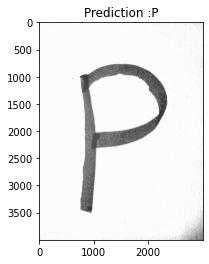

----------------------------


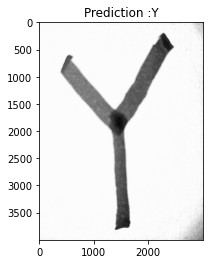

----------------------------


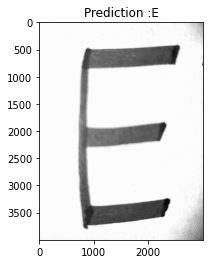

----------------------------


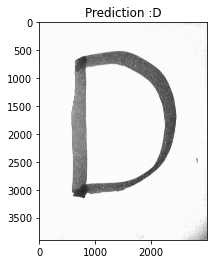

----------------------------


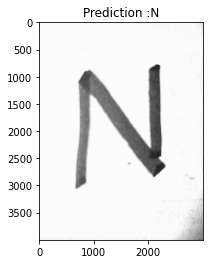

----------------------------


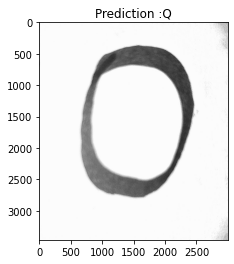

----------------------------


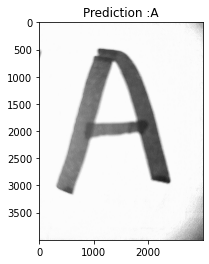

----------------------------


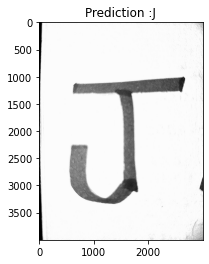

----------------------------


In [ ]:
for i in cv_img:
  image_processing(i)
  print('-'*28)